# 实验2-COVID19 Classification

*软件03 陈启乾 2020012385*

## 数据预处理


In [23]:
# import 必要的包

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

### 读入数据

使用 pandas 包读入 excel。

In [24]:
# 从 excel 文件中读取数据集
raw_data = pd.read_excel('data/dataset.xlsx', engine="openpyxl")
raw_data.columns = [x.lower().strip().replace(' ','_') for x in raw_data.columns]
raw_data.head()

pd.set_option("display.max_rows",500)
print(raw_data.info())
raw_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, patient_id to cto2_(arterial_blood_gas_analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB
None


,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 清理无用特征

我们对数据稍加观察就可以发现，有许多的列有非常多的空值。总共有 88% 的值都是空的。

In [25]:
raw_data.isna().sum().sum() / (raw_data.shape[0] * raw_data.shape[1])

0.8806003026414082

数据的阴性阳性比例也是非常不均衡，阳性仅有 10%，阴性为 90%。

In [26]:
raw_data_negative = raw_data[raw_data['sars-cov-2_exam_result'] == 'negative']
raw_data_positive = raw_data[raw_data['sars-cov-2_exam_result'] == 'positive']
print(f"positive cases: {raw_data_positive.shape[0]}, negative cases: {raw_data_negative.shape[0]}")
print(f"positive rate: {raw_data_positive.shape[0] / (raw_data.shape[0]) * 100}, negative rate: {raw_data_negative.shape[0] / (raw_data.shape[0]) * 100}")


positive cases: 558, negative cases: 5086
positive rate: 9.886605244507441, negative rate: 90.11339475549256


观察离散的量，并做一些替换（数字标签替换为 1-0 变量）。

In [27]:
# 输出值域

for col in raw_data.columns:
    unique_items_col = raw_data[col].unique()
    if len(unique_items_col) <= 5:
        print(col, unique_items_col)

# 替换一些数据

raw_data.replace({'yes':1, 'no':0}, inplace=True)
raw_data.replace({'positive':1, 'negative':0}, inplace=True)
raw_data.replace({'detected': 1, 'not_detected': 0}, inplace=True)
raw_data.replace({'present': 1, 'absent': 0, 'not_done' : 0}, inplace=True)

sars-cov-2_exam_result ['negative' 'positive']
patient_addmited_to_regular_ward_(1=yes,_0=no) [0 1]
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no) [0 1]
patient_addmited_to_intensive_care_unit_(1=yes,_0=no) [0 1]
respiratory_syncytial_virus [nan 'not_detected' 'detected']
influenza_a [nan 'not_detected' 'detected']
influenza_b [nan 'not_detected' 'detected']
parainfluenza_1 [nan 'not_detected' 'detected']
coronavirusnl63 [nan 'not_detected' 'detected']
rhinovirus/enterovirus [nan 'detected' 'not_detected']
mycoplasma_pneumoniae [nan]
coronavirus_hku1 [nan 'not_detected' 'detected']
parainfluenza_3 [nan 'not_detected' 'detected']
chlamydophila_pneumoniae [nan 'not_detected' 'detected']
adenovirus [nan 'not_detected' 'detected']
parainfluenza_4 [nan 'not_detected' 'detected']
coronavirus229e [nan 'not_detected' 'detected']
coronavirusoc43 [nan 'not_detected' 'detected']
inf_a_h1n1_2009 [nan 'not_detected' 'detected']
bordetella_pertussis [nan 'not_detected' 'detected']
metapneumov

In [28]:
# 列的 nan 情况

total_null_values = raw_data.isna().sum().sort_values(ascending=False)
not_null_values = raw_data.notna().sum().sort_values(ascending=False)
null_values_percentage = (raw_data.isnull().sum()/raw_data.notnull().count().sort_values(ascending=False)) * 100


raw_data_missing_values = pd.concat({
    'Null': total_null_values, 
    'Not Null': not_null_values, 
    'Percentage': null_values_percentage}
    , axis=1)

raw_data_missing_values
# plt.rcParams["figure.figsize"] = (10,15)
# is_null_raw_data.plot(kind="barh")

,Null,Not Null,Percentage
urine_-_sugar,5644,0,100.000000
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time (ptt),5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
fio2_(venous_blood_gas_analysis),5643,1,99.982282
urine_-_nitrite,5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257
albumin,5631,13,99.769667


注意到有很多列都是空的，我们削减掉有 98% 以上的数值都是空的特征，这样的特征有 49 列，剩下有 62 列。

In [29]:
percentage = 0.98
blank_col_to_drop = []
for col in raw_data.columns:
    if raw_data[col].isnull().sum()/len(raw_data[col]) > percentage:
        blank_col_to_drop.append(col)

print("drop columns number: ", len(blank_col_to_drop))
print(blank_col_to_drop)
data_clean_null = raw_data.drop(blank_col_to_drop, axis=1)

data_clean_null.head()


drop columns number:  49
['mycoplasma_pneumoniae', 'ionized_calcium', 'magnesium', 'fio2_(venous_blood_gas_analysis)', 'rods_#', 'segmented', 'promyelocytes', 'metamyelocytes', 'myelocytes', 'myeloblasts', 'urine_-_esterase', 'urine_-_aspect', 'urine_-_ph', 'urine_-_hemoglobin', 'urine_-_bile_pigments', 'urine_-_ketone_bodies', 'urine_-_nitrite', 'urine_-_density', 'urine_-_urobilinogen', 'urine_-_protein', 'urine_-_sugar', 'urine_-_leukocytes', 'urine_-_crystals', 'urine_-_red_blood_cells', 'urine_-_hyaline_cylinders', 'urine_-_granular_cylinders', 'urine_-_yeasts', 'urine_-_color', 'partial_thromboplastin_time\xa0(ptt)', 'relationship_(patient/normal)', 'lactic_dehydrogenase', 'prothrombin_time_(pt),_activity', 'vitamin_b12', 'creatine_phosphokinase\xa0(cpk)', 'ferritin', 'arterial_lactic_acid', 'lipase_dosage', 'd-dimer', 'albumin', 'hb_saturation_(arterial_blood_gases)', 'pco2_(arterial_blood_gas_analysis)', 'base_excess_(arterial_blood_gas_analysis)', 'ph_(arterial_blood_gas_analy

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,alkaline_phosphatase,strepto_a,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 清理废数据

虽然我们应该不放弃任何一组数据，但是我们发现有超过 3500 组数据只有 6 列（也就是我们预测目标的六列），这显然是无法进行预测的。所以我们把这三千五百多列踢出了数据集。

<AxesSubplot:>

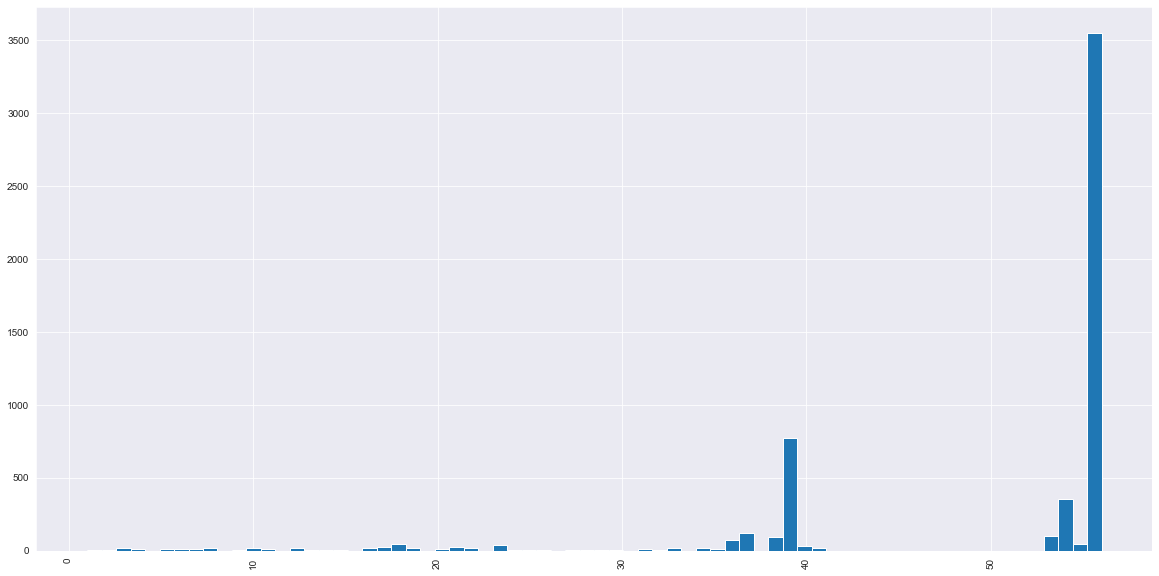

In [30]:
plt.figure(figsize=(20,10))
data_clean_null.isna().sum(axis=1).sort_values(ascending=False).hist(bins=70,xrot=90)

剩下了 2093 个数据和 63 个 feature 。

In [31]:
# 行
data_clean_null = data_clean_null[data_clean_null.shape[1] - data_clean_null.isna().sum(axis=1).sort_values(ascending=False) > 6]
data_clean_null

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,alkaline_phosphatase,strepto_a,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr)
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,0.615594,-0.554737,-0.283748,-0.562902,0.104088,-0.855513,0.036345,0.296546
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,02c84e61d5f9e18,1,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,88cce1444e16f9c,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5615,2733fac0d3f7138,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,...,NaN,NaN,-0.076199,-1.285224,0.553576,-1.101781,0.472572,0.527110,0.488635,-0.439076
5618,acd761fe16b5d0f,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,...,-0.608829,NaN,0.020652,1.603522,1.645738,2.623225,0.994592,1.197472,1.070151,0.522892
5626,42f299bee500ca4,7,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_clean_null_negative = data_clean_null[data_clean_null['sars-cov-2_exam_result'] == 0]
data_clean_null_positive = data_clean_null[data_clean_null['sars-cov-2_exam_result'] == 1]
print(f"positive cases: {data_clean_null_positive.shape[0]}, negative cases: {data_clean_null_negative.shape[0]}")
print(f"positive rate: {data_clean_null_positive.shape[0] / (data_clean_null.shape[0]) * 100}, negative rate: {data_clean_null_negative.shape[0] / (data_clean_null.shape[0]) * 100}")


positive cases: 180, negative cases: 1913
positive rate: 8.600095556617296, negative rate: 91.39990444338271


然后我们就要填入缺失的值，我们这里是默认将 nan 值填入 0。

随后，我们将其他的 label-typed 的特征转换为数字。

In [33]:
# # Fill in missing features
# for col in raw_data.columns:
#     if raw_data[col].dtype=='float16' or raw_data[col].dtype=='float32' or raw_data[col].dtype=='float64':
#         raw_data[col] = raw_data[col].fillna(raw_data[col].mean())

data_fill_null = data_clean_null.fillna(0)


# Convert label-typed features
for y in data_fill_null.columns:
    if data_fill_null[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data_fill_null[y].values))
        data_fill_null[y] = lbl.transform(list(data_fill_null[y].values))

data_fill_null.head(30)


,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,alkaline_phosphatase,strepto_a,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr)
1,182,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1800,15,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1165,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.000000,0.0,0.615594,-0.554737,-0.283748,-0.562902,0.104088,-0.855513,0.036345,0.296546
9,813,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,18,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,1508,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,150,13,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,2021,14,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,936,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042972
18,1752,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 特征工程(TODO 1)

我们接下来进行特征工程。

我们首先通过观察，创建出一个新的变量 `have_disease` 。

In [34]:
has_disease =  data_fill_null[data_fill_null.columns[21:38]].sum(axis=1)

data_fill_null = data_fill_null.drop(data_fill_null.columns[21:38], axis=1)
data_fill_null['has_disease'] = has_disease
data_fill_null.loc[data_fill_null['has_disease'] > 1, 'has_disease'] = 1
data_fill_null['has_disease'].value_counts(normalize=True)

data_fill_null[data_fill_null['has_disease'] == 1]['sars-cov-2_exam_result'].value_counts(normalize=True)

data_fill_null

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,strepto_a,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),international_normalized_ratio_(inr),has_disease
1,182,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,1800,15,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
8,1165,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.0,0.615594,-0.554737,-0.283748,-0.562902,0.104088,-0.855513,0.036345,0.296546,0.0
9,813,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11,18,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,1139,19,0,0,0,0,-0.289922,-0.523588,0.663397,-0.774677,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5615,353,15,0,0,0,0,0.717175,1.105468,-0.492289,-0.213711,...,0.0,-0.076199,-1.285224,0.553576,-1.101781,0.472572,0.527110,0.488635,-0.439076,0.0
5618,1423,17,0,0,0,0,-3.242548,-2.779203,-1.773594,-0.550290,...,0.0,0.020652,1.603522,1.645738,2.623225,0.994592,1.197472,1.070151,0.522892,0.0
5626,577,7,1,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


在做特征工程之前，我们首先丢掉一些不必要的量：患者编号、年龄，以及我们预测的目标。

画出热力图可以发现，相关性基本上已经比较不错，绝大多数的列都没有相关关系。

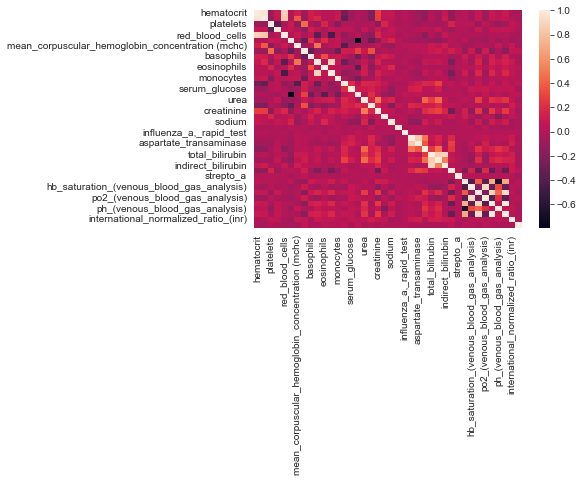

In [35]:
# drop label columns
label_col = ['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']
cols = [x for x in data_fill_null.columns if x not in label_col] # These columns are the features we can use to predict
data_without_result = data_fill_null.drop(label_col, axis=1)
# data_without_result.info()
sns.heatmap(data_without_result.corr())
plt.show()

接下来进行相关性检查。我们扔掉那些相关性绝对值大于 0.9 的列。结果是扔掉了 4 列。

['hemoglobin', 'po2_(venous_blood_gas_analysis)', 'total_co2_(venous_blood_gas_analysis)', 'hco3_(venous_blood_gas_analysis)']


<AxesSubplot:>

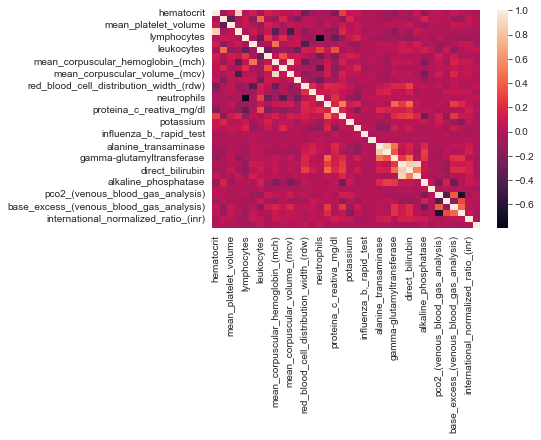

In [36]:
# Calculate the covariance matrix

corr_matrix = data_without_result.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

threshold = 0.90
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
data_without_result.drop(to_drop, axis=1, inplace=True)
print(to_drop)
sns.heatmap(data_without_result.corr())

接下来我们进行特征工程，试图利用一些已有的算法组合得到更有用意义的特征。

这里采用了如下五种算法：

1. PCA：直接调用 `sklearn.decomposition.PCA`
2. KernelPCA：直接调用 `sklearn.decomposition.KernelPCA`
3. NMF：将数据的每个元素都进行一个指数运算后，调用 `sklearn.decomposition.NMF`
4. LDA(Latent Dirichlet Allocation): 调用 `sklearn.decomposition.LatentDirichletAllocation`
5. GBDT(Gradient Boosting Decision Tree): 调用 `sklearn.ensemble.GradientBoostingClassifier` 组合 `sklearn.feature_selection.SelectFromModel` 选取重要特征。

In [37]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier



def do_pca(data, n_components = 15):
    pca = PCA(n_components = n_components)
    data = pd.DataFrame(pca.fit_transform(data))
    return data

def do_nmf(data, n_components = 15):
    non_negative = data.apply(np.exp,inplace=True)
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    data = pd.DataFrame(nmf.fit_transform(non_negative))
    return data

def do_kernel_pca(data, n_components = 15):
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    data = pd.DataFrame(kpca.fit_transform(data))
    return data

def do_lda(data, n_components = 15):
    non_negative = data.apply(np.exp,inplace=True)
    lda = LatentDirichletAllocation(n_components=n_components)
    data = pd.DataFrame(lda.fit_transform(non_negative))
    return data

def do_gbdt(data, n_components = 15):
    X = data
    Y = data_fill_null['sars-cov-2_exam_result']
    X_new = pd.DataFrame(SelectFromModel(GradientBoostingClassifier()).fit_transform(X, Y))
    return X_new


## 模型拟合（TODO 2）

手动实现 KNN。

In [38]:
class myKNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        try:
            self.x_train = X_train.copy().to_numpy()
            self.y_train = y_train.copy().to_numpy()
        except:
            self.x_train = X_train.copy()
            self.y_train = y_train.copy()

    def calculate_euclidean(self, sample1, sample2):
        return np.sqrt(np.sum((sample1 - sample2) ** 2))

    def k_nearest_neighbors(self, test_sample):
        distances = [ (self.y_train[i], self.calculate_euclidean(test_sample, self.x_train[i])) for i in range(len(self.x_train))]
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):  # get first k samples
            neighbors.append(distances[i][0])
        return neighbors

    def predict(self, test_set):
        try:
            test_set = test_set.copy().to_numpy()
        except:
            test_set = test_set.copy()
        predictions = []
        for test_sample in test_set:
            neighbors = self.k_nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions


调用 `sklearn` 库使用了 MLP, KNN, SVM, Logistic Regression, Decesion Tree, Random Forest 算法。

可以看到，手动实现的 KNN 和 sklearn 库中的 KNN 效果相同。因此，后面都只会使用 sklearn 中的 KNN 函数。

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import ks_2samp
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


model_list = []

def generate_test_set(X, Y, test_size):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=test_size, random_state=1)
    return X_train, X_test, Y_train, Y_test


# smt = SMOTE(k_neighbors=1, random_state=42)
# X_train, Y_train = smt.fit_resample(X_train, Y_train)
# np.bincount(Y_train)

def model_assess(model, X_train, X_test, Y_train, Y_test, name='Default'):
    print("-----------------------------------------------------")
    model.fit(X_train, Y_train)  
    Y_pred = model.predict(X_test)
    print(f'Name:{name}')
    print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))  
    print("Classification Report: \n", classification_report(Y_test, Y_pred, digits=3))  

all_class_weight_list = [{0: 0.15, 1: 0.85}, {0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75}, {0: 0.3, 1: 0.7}, {0: 0.35, 1: 0.65}, {0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55}, {0: 0.5, 1: 0.5}, {0: 0.55, 1: 0.45}, {0: 0.6, 1: 0.4}, {0: 0.65, 1: 0.35}, {0: 0.7, 1: 0.3}, {0: 0.75, 1: 0.25}, {0: 0.8, 1: 0.2}, {0: 0.85, 1: 0.15}]

# try different models
model_list.append({
    'model':KNeighborsClassifier(n_neighbors=7, n_jobs=-1), 
    'param_grid' : { 'n_neighbors': np.arange(1,30)}, 
    'name':'KNN'})
model_list.append({
    'model':SVC(class_weight={0: 0.15, 1: 0.85}, kernel='rbf', probability=True, random_state=101), 
    'param_grid' : { 'class_weight': all_class_weight_list, 'kernel': ['rbf', 'linear'], 'random_state': [101]},
    'name':'SVM'})
model_list.append({
    'model':LogisticRegression(class_weight={0: 0.15, 1: 0.85},n_jobs=-1, random_state=101),
    'param_grid' : { 'class_weight': all_class_weight_list, 'penalty': ['l1', 'l2', 'elasticnet'], 'random_state': [101]},
    'name':'Logistic Regression'})
model_list.append({
    'model':DecisionTreeClassifier(), 
    'param_grid' : { 'class_weight': all_class_weight_list, 'criterion': ['gini', 'entropy']},
    'name':'Decision Tree'})
model_list.append({
    'model':RandomForestClassifier(n_estimators=11, random_state=101), 
    'param_grid' : { 'class_weight': all_class_weight_list, 'n_estimators' : np.arange(10, 15), 'criterion': ['gini', 'entropy'], 'random_state': [101]},
    'name':'Random Forest'})
model_list.append({
    'model':MLPClassifier(hidden_layer_sizes=(100,), max_iter=100000,random_state=101), 
    'param_grid' : { 'hidden_layer_sizes' : [(100,), (200,), (300,), (50, 50), (100, 100) , (50, 50, 50), (50, 50, 30, 30)] , 'random_state': [101]},
    'name':'MLP'})


def assess_model():
    X_train, X_test, Y_train, Y_test = generate_test_set(data_without_result, data_fill_null['sars-cov-2_exam_result'], 0.33)

    myknn = myKNN(k=7)
    model_assess(myknn, X_train, X_test, Y_train, Y_test, name='myKNN')

    for model in model_list:
        model_assess(model['model'], X_train, X_test, Y_train, Y_test, model['name'])

assess_model()

-----------------------------------------------------
Name:myKNN
Confusion Matrix: 
 [[621  11]
 [ 50   9]]
Classification Report: 
               precision    recall  f1-score   support

           0      0.925     0.983     0.953       632
           1      0.450     0.153     0.228        59

    accuracy                          0.912       691
   macro avg      0.688     0.568     0.591       691
weighted avg      0.885     0.912     0.891       691

-----------------------------------------------------
Name:KNN
Confusion Matrix: 
 [[621  11]
 [ 50   9]]
Classification Report: 
               precision    recall  f1-score   support

           0      0.925     0.983     0.953       632
           1      0.450     0.153     0.228        59

    accuracy                          0.912       691
   macro avg      0.688     0.568     0.591       691
weighted avg      0.885     0.912     0.891       691

-----------------------------------------------------
Name:SVM
Confusion Matrix: 


## 评估并选择超参数（TODO 3）

我们使用 Grid CV 的方法进行 Cross Validation，试图选择一个效果最好的超参数。


考虑到数据的不均衡性，采用 Accuracy 单独评价不能够准确地反映出我们模型的成果。

因此采用了 F1 Score，希望能够均衡反应出模型在不均衡数据上的表现。

### 交叉验证评估

这里采用了分层抽样的方法（StratifiedKFold），以保证在数据样本不均衡的情况下达到更好的效果，并且采用了五折的验证方法。

In [40]:
# use grid cv
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

def model_best_selection(model, X_train, X_test, Y_train, Y_test, param_grid, name='Default', scoring='f1'):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring = scoring, n_jobs=-1, refit=True)
    grid.fit(X_train, Y_train)
    print(f'Name:{name}')
    print(f'Best parameters: {grid.best_params_}')
    print(f'Best train score: {grid.best_score_}')
    print(f'Best test score: {grid.score(X_test, Y_test)}')
    return {
        'name':name,
        'best_params':grid.best_params_,
        'best_train_score':grid.best_score_,
        'best_test_score':grid.score(X_test, Y_test),
        'best_estimator':grid.best_estimator_
    }


def models_best_selection():
    X_train, X_test, Y_train, Y_test = generate_test_set(data_without_result, data_fill_null['sars-cov-2_exam_result'], 0.33)
    model_results = []
    for model in model_list:
        model_results.append(model_best_selection(model['model'], X_train, X_test, Y_train, Y_test, model['param_grid'], model['name']))
    return model_results

model_results = models_best_selection()


Name:KNN
Best parameters: {'n_neighbors': 3}
Best train score: 0.3200037526972511
Best test score: 0.2696629213483146
Name:SVM
Best parameters: {'class_weight': {0: 0.35, 1: 0.65}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.3953395933883738
Best test score: 0.3877551020408163
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.4120616003528651
Best test score: 0.352
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'criterion': 'gini'}
Best train score: 0.3744627744627745
Best test score: 0.28888888888888886
Name:Random Forest
Best parameters: {'class_weight': {0: 0.45, 1: 0.55}, 'criterion': 'gini', 'n_estimators': 13, 'random_state': 101}
Best train score: 0.2926641014828871
Best test score: 0.2465753424657534
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50, 30, 30), 'random_state': 101}
Best train score: 0.3495625942684766
Best test score: 0.32258064

我们将不同模型最好参数下 F1 Score 可视化出来。可以看到，在训练集上，Logistic Regression 的分数最高，而在测试集上，是 SVM 的分数最高。

所有的数据，测试集的正确率都低于训练集，说明模型的泛化能力较为有限。

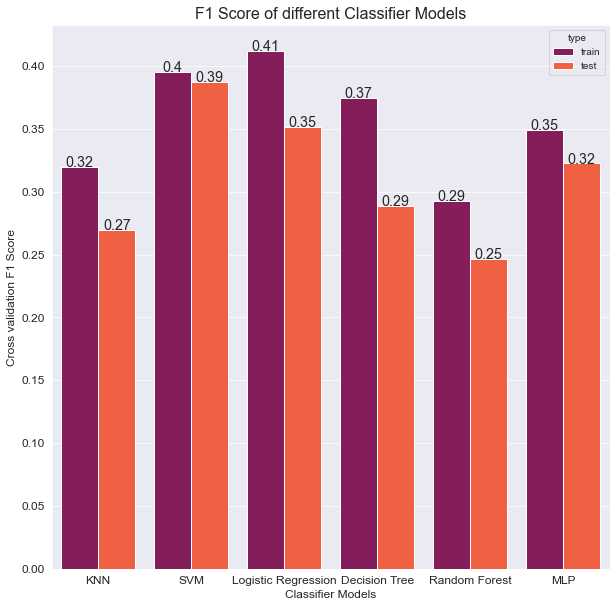

In [41]:
def plot_results(model_results, name = None):
    plt.rcParams['figure.figsize']=10,10
    sns.set_style('darkgrid')
    plot_data = pd.concat(
        [pd.DataFrame({'name': [model_result['name'] for model_result in model_results],
                        'score':[model_result['best_train_score'] for model_result in model_results],
                        'type': ['train' for model_result in model_results]}),
        pd.DataFrame({'name': [model_result['name'] for model_result in model_results],
                                'score':[model_result['best_test_score'] for model_result in model_results],
                                'type': ['test' for model_result in model_results]})
        ],axis=0)
    ax1 = sns.barplot(
        x = 'name', 
        y = 'score',
        hue='type',
        data=plot_data,
        palette = "rocket", saturation = 2.0)
    plt.xlabel('Classifier Models', fontsize = 12 )
    plt.ylabel('Cross validation F1 Score', fontsize = 12)
    if name is not None:
        plt.title(f'F1 Score of different Classifier Models using {name}', fontsize = 16)
    else:
        plt.title('F1 Score of different Classifier Models', fontsize = 16)
    plt.xticks(fontsize = 12, horizontalalignment = 'center')
    plt.yticks(fontsize = 12)
    for i in ax1.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax1.annotate(f'{round(height,2)}', (x + width/2, y + height), ha='center', fontsize = 'x-large')
    plt.show()

plot_results(model_results)

### ROC 曲线以及 AUC

除此之外，在数据不均衡时经常使用的另一个指标还有 ROC 曲线，以及其下的 AUC 面积。ROC曲线越高，AUC 越大说明模型的性能越好。瞎猜的模型的 AUC 为 0.5。

使用 `sklearn.metrics` 里面的 `roc_curve` 和 `auc` 计算以上两者。

结合作图，我们可以发现，模型的 AUC 在 0.6~0.8 之间，说明经过清洗的数据输入模型后，模型还是学到了一些特征。

AUC of KNN model: 0.6671315168418794
AUC of SVM model: 0.7425311092040334
AUC of Logistic Regression model: 0.7480020381892297
AUC of Decision Tree model: 0.6215672602445828
AUC of Random Forest model: 0.7302349281270114
AUC of MLP model: 0.7042882428663377


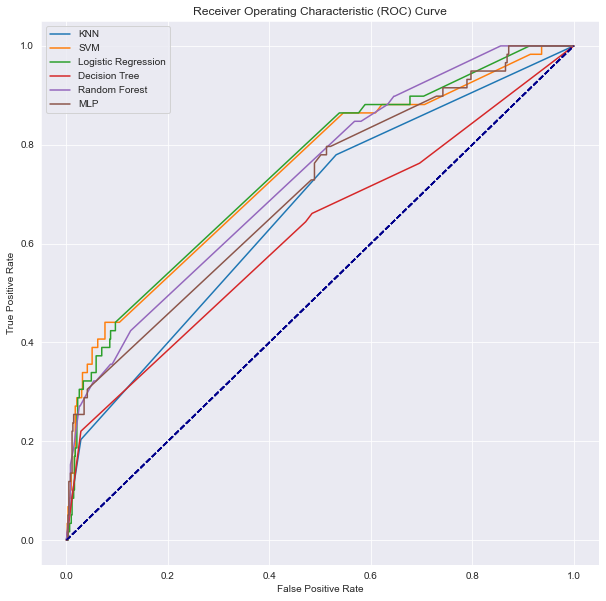

In [42]:
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(model, X_test, Y_test, name):
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(Y_test, probs)
    plt.rcParams['figure.figsize']=10,10
    plt.plot(fper, tper, label= name)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    print(f'AUC of {name} model: {auc(fper, tper)}')


def plot_roc_curves(model_results):
    for model_result in model_results:
        X_train, X_test, Y_train, Y_test = generate_test_set(data_without_result, data_fill_null['sars-cov-2_exam_result'], 0.33)
        try:
            plot_roc_curve(model_result['best_estimator'], X_test, Y_test, model_result['name'])
        except:
            print(f'{model_result["name"]} model has no roc curve')
    plt.show()

plot_roc_curves(model_results)


### 评价不同的维度缩减方法 (TODO 1)

在下面评估了四种维度缩减方法的效果：PCA，KernelPCA，NMF，LDA。我们在这里仅仅使用 Decision Tree，MLP 两种模型进行评估。

Name:KNN
Best parameters: {'n_neighbors': 5}
Best train score: 0.24191519265048678
Best test score: 0.24
Name:SVM
Best parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.39612768184196756
Best test score: 0.40540540540540543
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.25, 1: 0.75}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.3923045898201178
Best test score: 0.4
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'gini'}
Best train score: 0.30962716869693613
Best test score: 0.28125
Name:Random Forest
Best parameters: {'class_weight': {0: 0.75, 1: 0.25}, 'criterion': 'entropy', 'n_estimators': 10, 'random_state': 101}
Best train score: 0.15449452508276035
Best test score: 0.17391304347826084
Name:MLP
Best parameters: {'hidden_layer_sizes': (300,), 'random_state': 101}
Best train score: 0.3117496443812233
Best test score: 0.4333333333333334


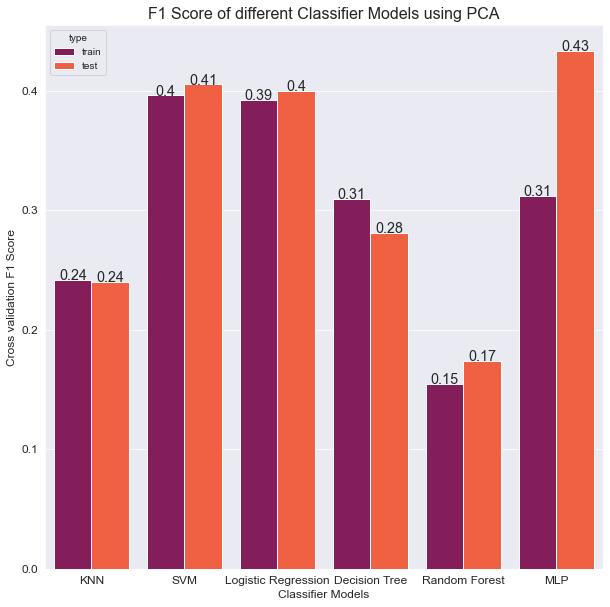

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.20115358686787257
Best test score: 0.11594202898550725
Name:SVM
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'kernel': 'rbf', 'random_state': 101}
Best train score: 0.17477225349176567
Best test score: 0.14285714285714285
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.09432178932178932
Best test score: 0.18518518518518517
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'criterion': 'gini'}
Best train score: 0.24781535067249352
Best test score: 0.20689655172413796
Name:Random Forest
Best parameters: {'class_weight': {0: 0.55, 1: 0.45}, 'criterion': 'gini', 'n_estimators': 11, 'random_state': 101}
Best train score: 0.16049543951982975
Best test score: 0.11764705882352941
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50, 30, 30), 'random_state': 101}
Best train score: 0.037575757575757575
Best t

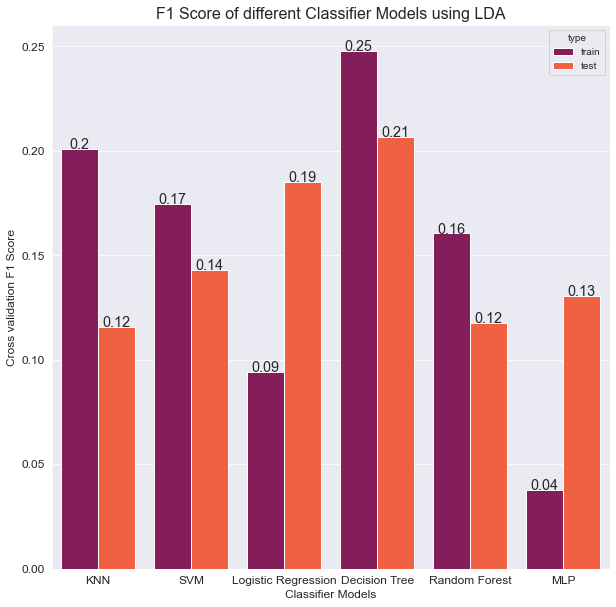

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.2336665849873397
Best test score: 0.3733333333333333
Name:SVM
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.3429558338670272
Best test score: 0.3835616438356164
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.3716195220597302
Best test score: 0.41176470588235287
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.55, 1: 0.45}, 'criterion': 'entropy'}
Best train score: 0.2704818217013339
Best test score: 0.2807017543859649
Name:Random Forest
Best parameters: {'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'entropy', 'n_estimators': 11, 'random_state': 101}
Best train score: 0.1968859267845069
Best test score: 0.0851063829787234
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50), 'random_state': 101}
Best train score: 0.30030206677265503
Best test score: 

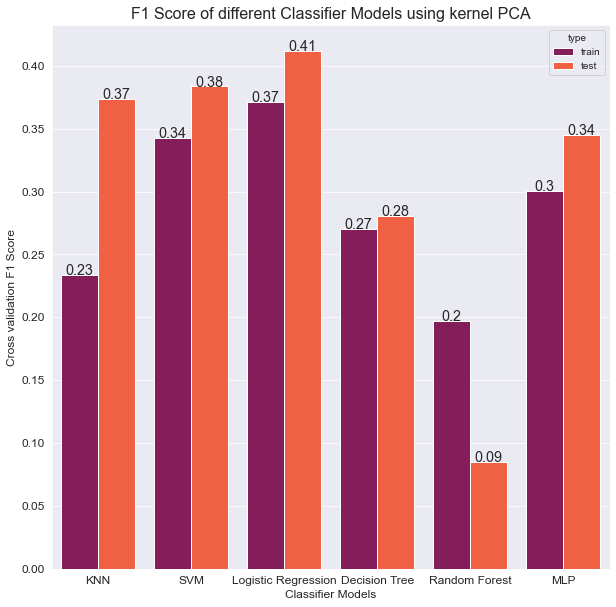

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.10423409619392579
Best test score: 0.2
Name:SVM
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.013793103448275858
Best test score: 0.0
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.013793103448275858
Best test score: 0.0
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'criterion': 'gini'}
Best train score: 0.14990052325915704
Best test score: 0.25
Name:Random Forest
Best parameters: {'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'entropy', 'n_estimators': 11, 'random_state': 101}
Best train score: 0.08231896507513206
Best test score: 0.14814814814814814
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50, 30, 30), 'random_state': 101}
Best train score: 0.12544822466723993
Best test score: 0.08888888888888889


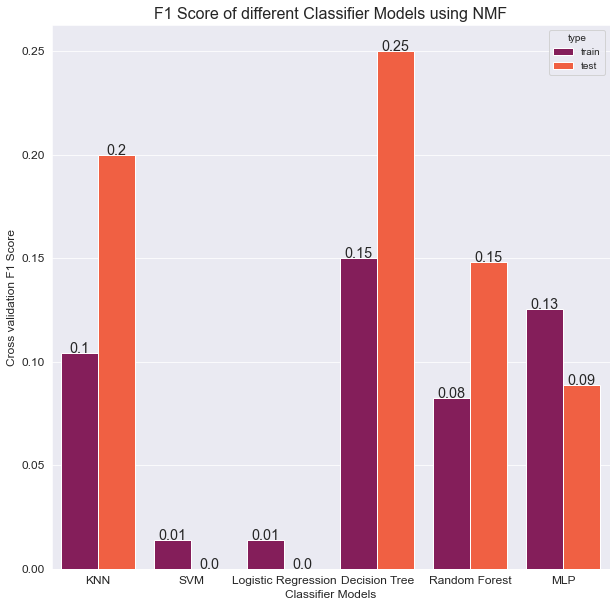

Name:KNN
Best parameters: {'n_neighbors': 3}
Best train score: 0.34684210526315795
Best test score: 0.39344262295081966
Name:SVM
Best parameters: {'class_weight': {0: 0.25, 1: 0.75}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.4085323404724209
Best test score: 0.4225352112676057
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.4169412175126461
Best test score: 0.4155844155844156
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.55, 1: 0.45}, 'criterion': 'entropy'}
Best train score: 0.40030383053638874
Best test score: 0.3
Name:Random Forest
Best parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'gini', 'n_estimators': 11, 'random_state': 101}
Best train score: 0.3483471795546099
Best test score: 0.22641509433962262
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50, 50), 'random_state': 101}
Best train score: 0.34999036051667626
Best test score: 0.35483870967

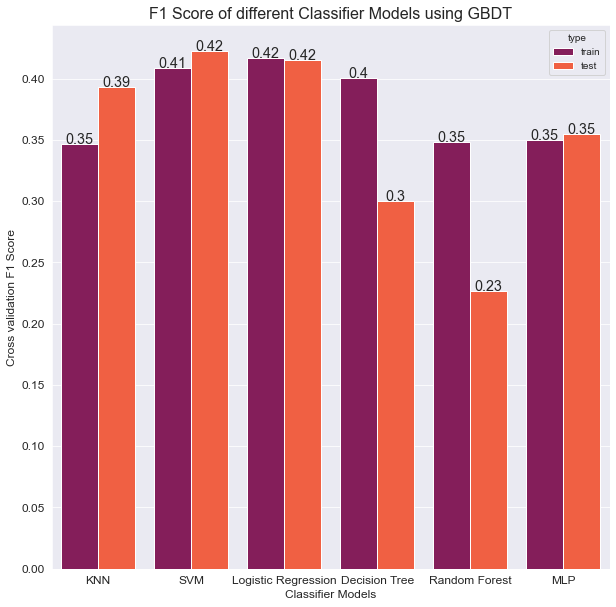

In [43]:
def evaluate_method(method, name):
    data_processed = method(data_without_result, n_components = 15)
    X_train, X_test, Y_train, Y_test = train_test_split(data_processed, data_fill_null['sars-cov-2_exam_result'], test_size=0.2, random_state=101)

    this_time_result = []
    for model in model_list:
        this_time_result.append(model_best_selection(model['model'], X_train, X_test, Y_train, Y_test, model['param_grid'], model['name']))
    plot_results(this_time_result, name)

evaluate_method(do_pca, 'PCA')
evaluate_method(do_lda, 'LDA')
evaluate_method(do_kernel_pca, 'kernel PCA')
evaluate_method(do_nmf, 'NMF')
evaluate_method(do_gbdt, 'GBDT')

综合来说，Kernel PCA, PCA 和 GBDT 的效果较好，这几种方法都可以稍微提升一些训练的准确度，并且最关键的是提高了（大部分模型的）泛化能力。但是需要矩阵非负的 LDA 与 NMF 效果都不好，也可能是作者使用了错误的处理方法。

## 迁移到其他任务（TODO 4）

任务还要求我们迁移到第 3 - 6 列的标签。我们重新训练模型。

需要提到的是，由于实现的方法问题，我们仍然采用的是之前的训练集。

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.1316017316017316
Best test score: 0.2777777777777778
Name:SVM
Best parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.2543040293040293
Best test score: 0.27999999999999997
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.18745098039215685
Best test score: 0.2916666666666667
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.8, 1: 0.2}, 'criterion': 'gini'}
Best train score: 0.2300207039337474
Best test score: 0.186046511627907
Name:Random Forest
Best parameters: {'class_weight': {0: 0.65, 1: 0.35}, 'criterion': 'gini', 'n_estimators': 10, 'random_state': 101}
Best train score: 0.1706293706293706
Best test score: 0.06896551724137931
Name:MLP
Best parameters: {'hidden_layer_sizes': (50, 50, 50), 'random_state': 101}
Best train score: 0.17361853832442065
Best test score: 0.0

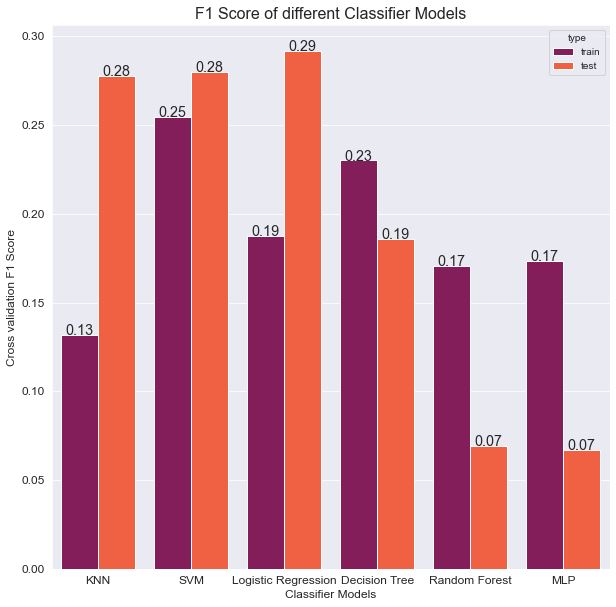

AUC of KNN model: 0.5320880712293499
AUC of SVM model: 0.6544598798541087
AUC of Logistic Regression model: 0.626971143531431
AUC of Decision Tree model: 0.46466691697060725
AUC of Random Forest model: 0.5729859472216263
AUC of MLP model: 0.5006302295644711


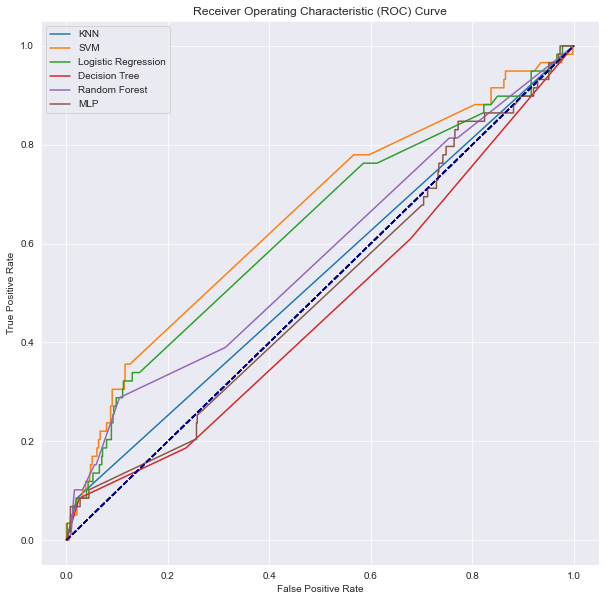

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.12444444444444444
Best test score: 0.0
Name:SVM
Best parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.22833333333333333
Best test score: 0.21052631578947367
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.1516017316017316
Best test score: 0.2631578947368421
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'entropy'}
Best train score: 0.27708761826408884
Best test score: 0.1818181818181818
Name:Random Forest
Best parameters: {'class_weight': {0: 0.15, 1: 0.85}, 'criterion': 'entropy', 'n_estimators': 11, 'random_state': 101}
Best train score: 0.14603174603174604
Best test score: 0.0
Name:MLP
Best parameters: {'hidden_layer_sizes': (200,), 'random_state': 101}
Best train score: 0.1898989898989899
Best test score: 0.07407407407407408


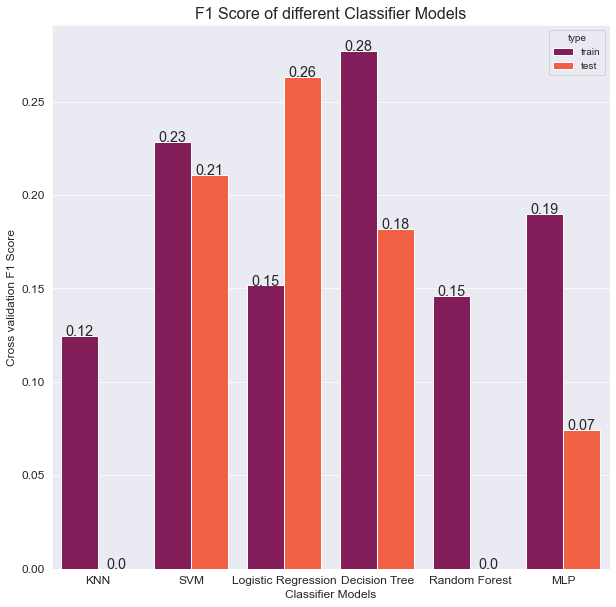

AUC of KNN model: 0.5098288993778158
AUC of SVM model: 0.45292051062003863
AUC of Logistic Regression model: 0.4460013945505257
AUC of Decision Tree model: 0.46722806264750055
AUC of Random Forest model: 0.48735518129156835
AUC of MLP model: 0.47562218408066936


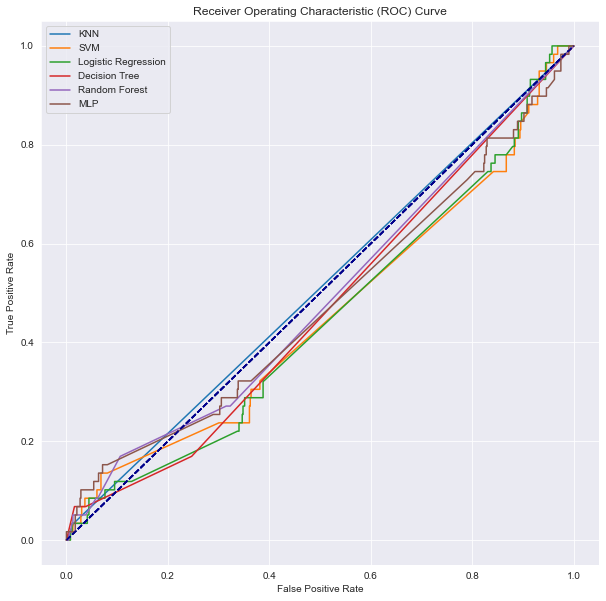

Name:KNN
Best parameters: {'n_neighbors': 1}
Best train score: 0.2704761904761905
Best test score: 0.0
Name:SVM
Best parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'kernel': 'linear', 'random_state': 101}
Best train score: 0.35
Best test score: 0.08695652173913043
Name:Logistic Regression
Best parameters: {'class_weight': {0: 0.6, 1: 0.4}, 'penalty': 'l2', 'random_state': 101}
Best train score: 0.3227272727272727
Best test score: 0.0
Name:Decision Tree
Best parameters: {'class_weight': {0: 0.55, 1: 0.45}, 'criterion': 'gini'}
Best train score: 0.35666666666666663
Best test score: 0.07692307692307691
Name:Random Forest
Best parameters: {'class_weight': {0: 0.75, 1: 0.25}, 'criterion': 'gini', 'n_estimators': 12, 'random_state': 101}
Best train score: 0.32142857142857145
Best test score: 0.11764705882352941
Name:MLP
Best parameters: {'hidden_layer_sizes': (100, 100), 'random_state': 101}
Best train score: 0.33888888888888885
Best test score: 0.11111111111111112


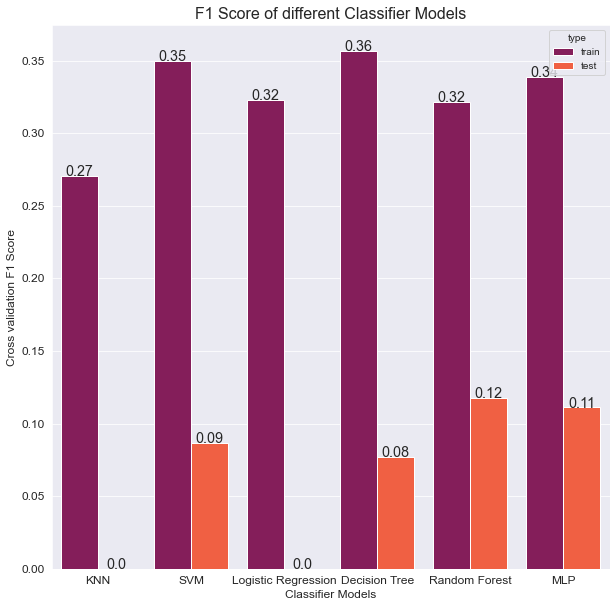

AUC of KNN model: 0.5137845955803475
AUC of SVM model: 0.41489219051705645
AUC of Logistic Regression model: 0.40268987341772156
AUC of Decision Tree model: 0.4608050847457627
AUC of Random Forest model: 0.5063827504827291
AUC of MLP model: 0.46555192018880065


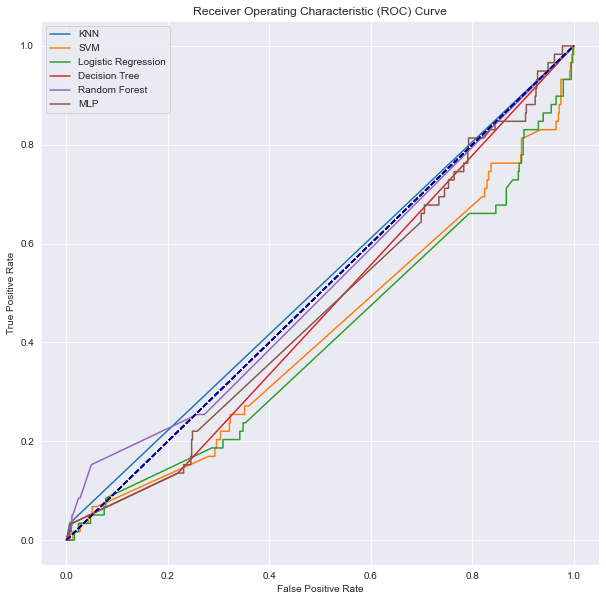

In [44]:
def predict_feature(feature_name):
    X_train, X_test, Y_train, Y_test = generate_test_set(data_without_result, data_fill_null[feature_name], 0.33)
    model_results = []
    for model in model_list:
        model_results.append(model_best_selection(model['model'], X_train, X_test, Y_train, Y_test, model['param_grid'], model['name']))
    plot_results(model_results)
    plot_roc_curves(model_results)

predict_feature('patient_addmited_to_regular_ward_(1=yes,_0=no)')
predict_feature('patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)')
predict_feature('patient_addmited_to_intensive_care_unit_(1=yes,_0=no)')
        

训练的效果不太好，基本上没有学到什么东西，因为 AUC 的面积都在 0.5 上下。